## Bike Sharing Assignment using Liner Regression method

#### Goal: build a multiple linear regression model for the prediction of demand for shared bikes

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### Importing Required Libraries

In [1]:
# Loading Libraries
## Data Manipulation
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading data and presenting data

In [2]:
# Loading Data
bike_data = pd.read_csv('day.csv')
# First 5 rows of the data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Load basic information of data

In [4]:
## Number of rows and columns
print('Number of Columns:',bike_data.shape[1])
print('Number of Rows:',bike_data.shape[0])
## Number of missing values
print('Number of missing values:',bike_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',bike_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',bike_data.duplicated().sum())

Number of Columns: 16
Number of Rows: 730
Number of missing values: 0
Number of unique values: 5900
Number of duplicates: 0


#### Load basic information of dataframe

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Describing dataframe

In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Checking columns of dataframe

In [9]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Checking null values in dataframe

In [10]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### No null values present in dataframe

#### Removing the irrelevant features

In [12]:
# Removing 'instant' column as duplicate of index of dataframe and no significance to output
bike_data.drop(['instant'],axis=1,inplace=True)
# Removing 'casual' and 'registered' columns as they are reduntant, similar to cnt column
bike_data.drop(['casual','registered'],axis=1,inplace=True)
# First 5 rows of the data
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Checking datatypes of columns

In [13]:
bike_data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Converting to categorical columns

In [15]:
# 'dteday' column
## Convert 'dteday' column to datetime format
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'],dayfirst=True)
## Deriving "days since the data started"
bike_data['days_from_start'] = (bike_data.dteday - pd.to_datetime('2018-01-01',format='%Y-%m-%d')).dt.days
## Removing 'dteday' column
bike_data.drop(['dteday'],axis=1,inplace=True)

In [16]:
# 'season' column
## Converting 'season' column to categorical
bike_data.season = bike_data.season.astype('str').map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})

In [17]:
# 'yr' column
## No need for correction as it is already in the correct format

In [18]:
# 'mnth' column
## Converting 'mnth' column to string name of the month
bike_data.mnth = bike_data.mnth.astype('str').map({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})

In [19]:
# 'holiday' column
## No need for correction as it is already in the correct format

In [20]:
# 'weekday' column
## Converting 'weekday' column to string name of the day
bike_data.weekday = bike_data.weekday.astype('str').map({'1':'Mon', '2':'Tue', '3':'Wed', '4':'Thu', '5':'Fri', '6':'Sat', '0':'Sun'})

## Deriving 'weekend' column
bike_data['weekend'] = bike_data.weekday.map({'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':1, 'Sun':1})

In [21]:
# 'workingday' column
## No need for correction as it is already in the correct format

In [22]:
# 'weathersit' column
## Converting 'weathersit' column to sting name of the weather situation
	# + weathersit : 
	# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_data.weathersit = bike_data.weathersit.astype('str').map({'1':'Clear', '2':'Cloudy', '3':'Rainy', '4':'Storm'})

In [23]:
# 'temp','atemp','hum','windspeed' columns
## Rounding the values of 'temp','atemp','hum','windspeed' columns to 3 decimal places
bike_data[['temp','atemp','hum','windspeed']] = bike_data[['temp','atemp','hum','windspeed']].round(3)

#### Checking data frame after corrections and deriving new columns

In [24]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985,0,1
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349,2,0
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562,3,0
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600,4,0


#### Data Visualization

##### Checking pairplot for numerical columns for correlation

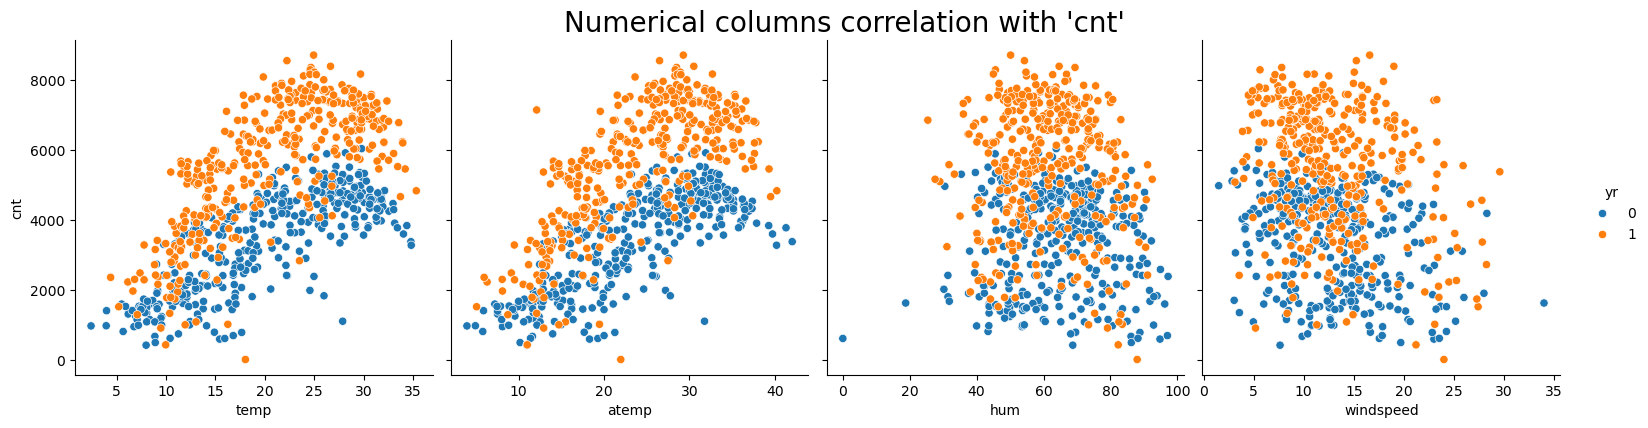

In [26]:
num_cols=['temp','atemp','hum','windspeed']
sns.pairplot(data=bike_data,x_vars=num_cols,y_vars='cnt',diag_kind='kde',hue='yr',palette='tab10',size=4)
plt.title("Numerical columns correlation with 'cnt'",fontsize=20,color='black',x=-1.0)
plt.show()

##### Checking pairplot of Numerical columns to each other for correlation

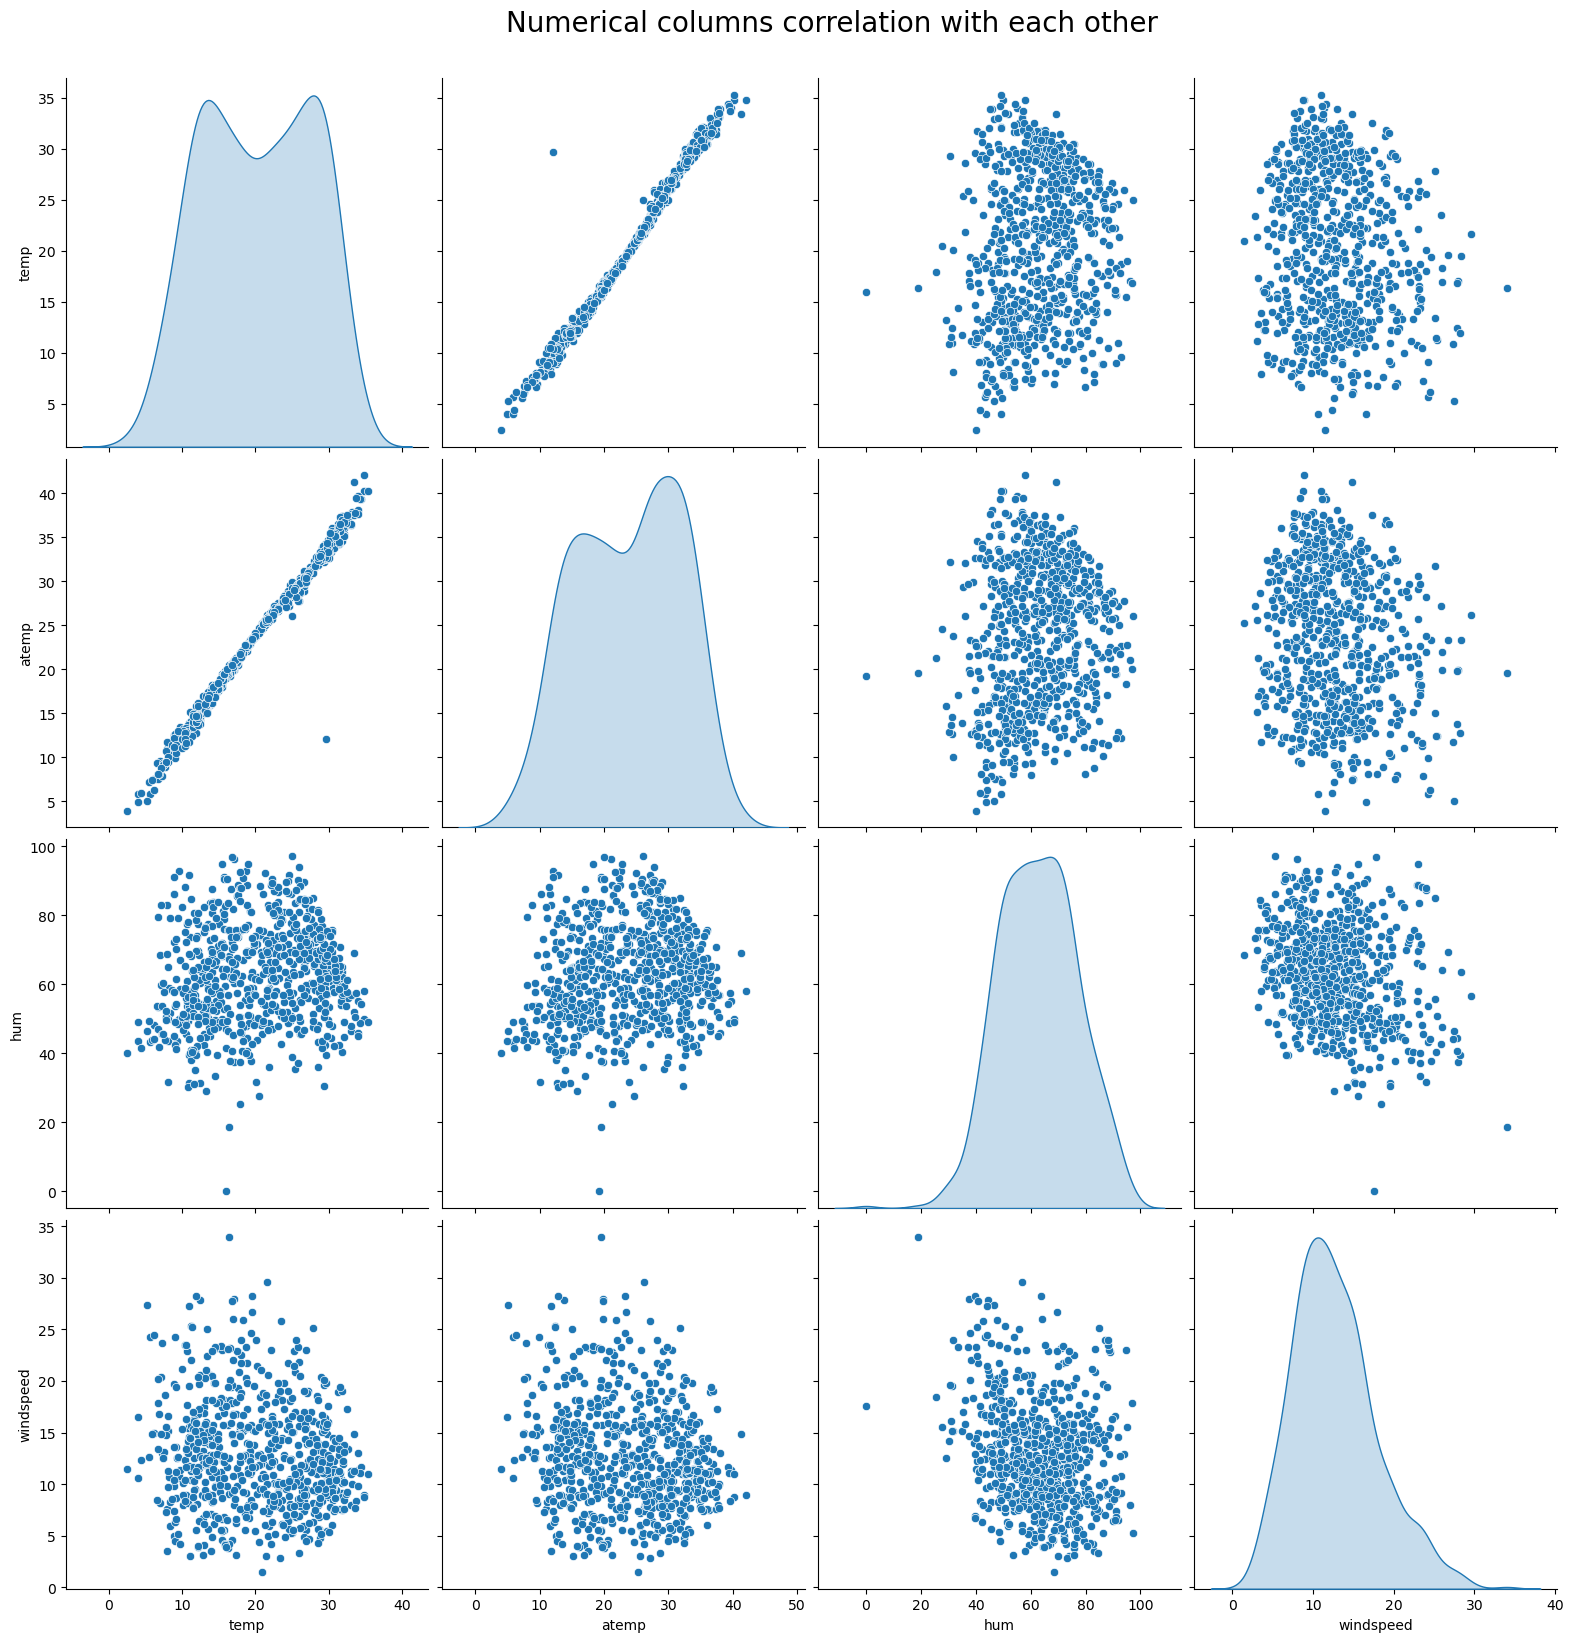

In [28]:
sns.pairplot(data=bike_data,x_vars=num_cols,y_vars=num_cols,diag_kind='kde',palette='tab10',size=4)
plt.title("Numerical columns correlation with each other",fontsize=20,color='black',x=-1.0,y=4.2)
plt.show()

##### Combining categorical columns

In [29]:
cat_cols=['season','yr','mnth','holiday','weekday','weekend','workingday','weathersit']

##### Checking boxplot of Categories columns

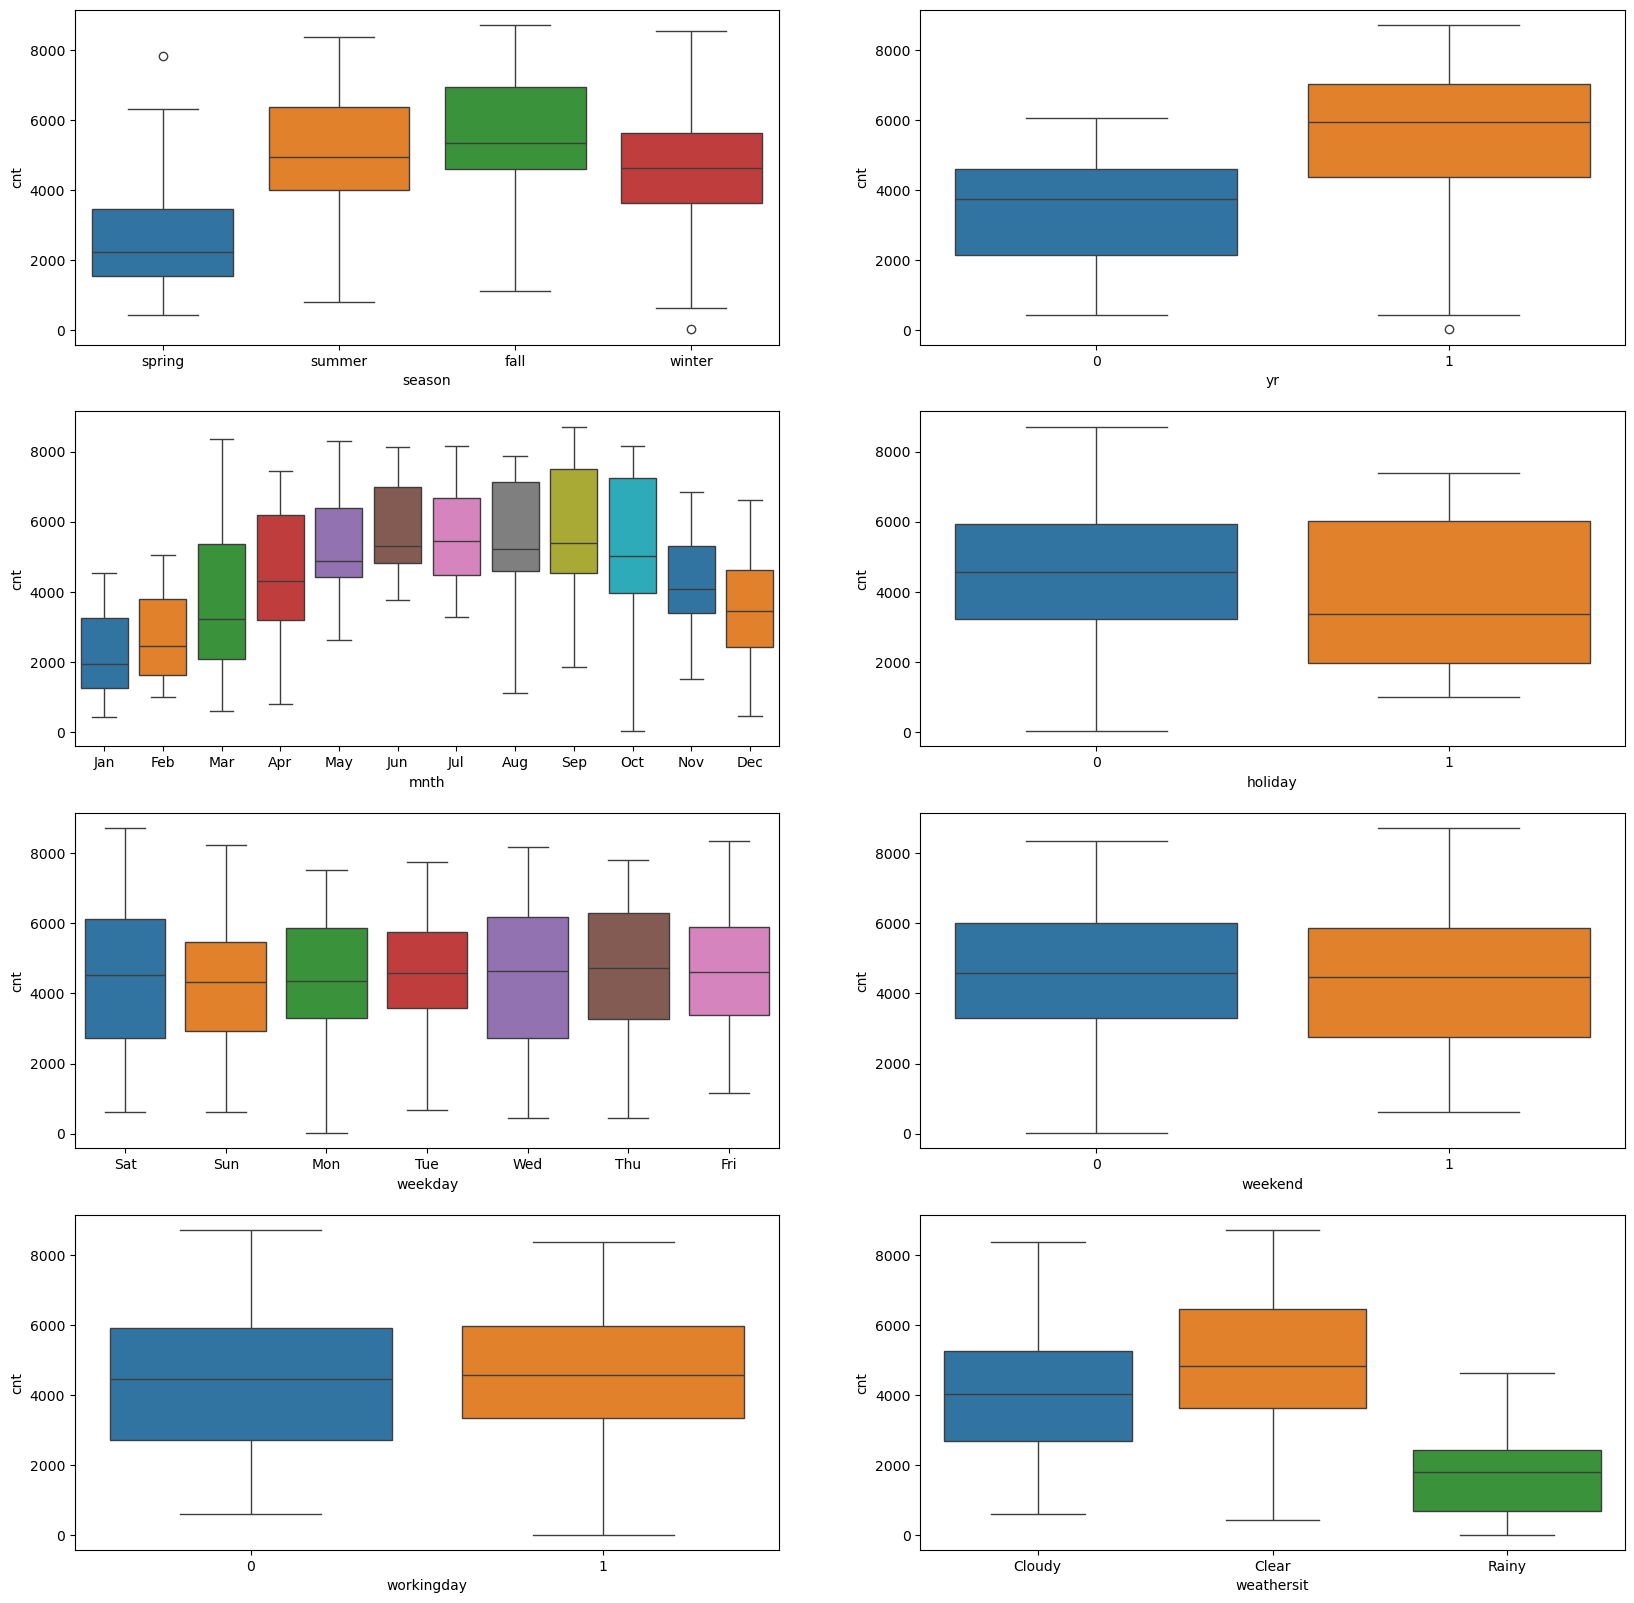

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,6)
sns.boxplot(x='weekend',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,7)
sns.boxplot(x='workingday',y='cnt',data=bike_data,palette='tab10')
plt.subplot(4,2,8)
sns.boxplot(x='weathersit',y='cnt',data=bike_data,palette='tab10')
plt.show()

##### conclusions: yet to write that

##### Correlation betweek data and target column

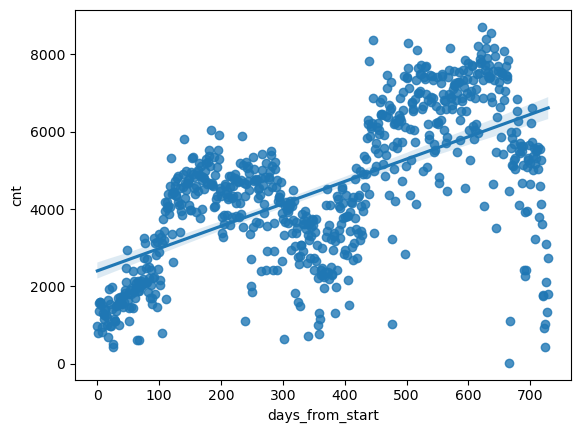

In [31]:
sns.regplot(x='days_from_start',y='cnt',data=bike_data)
plt.show()

##### Correlation of all data

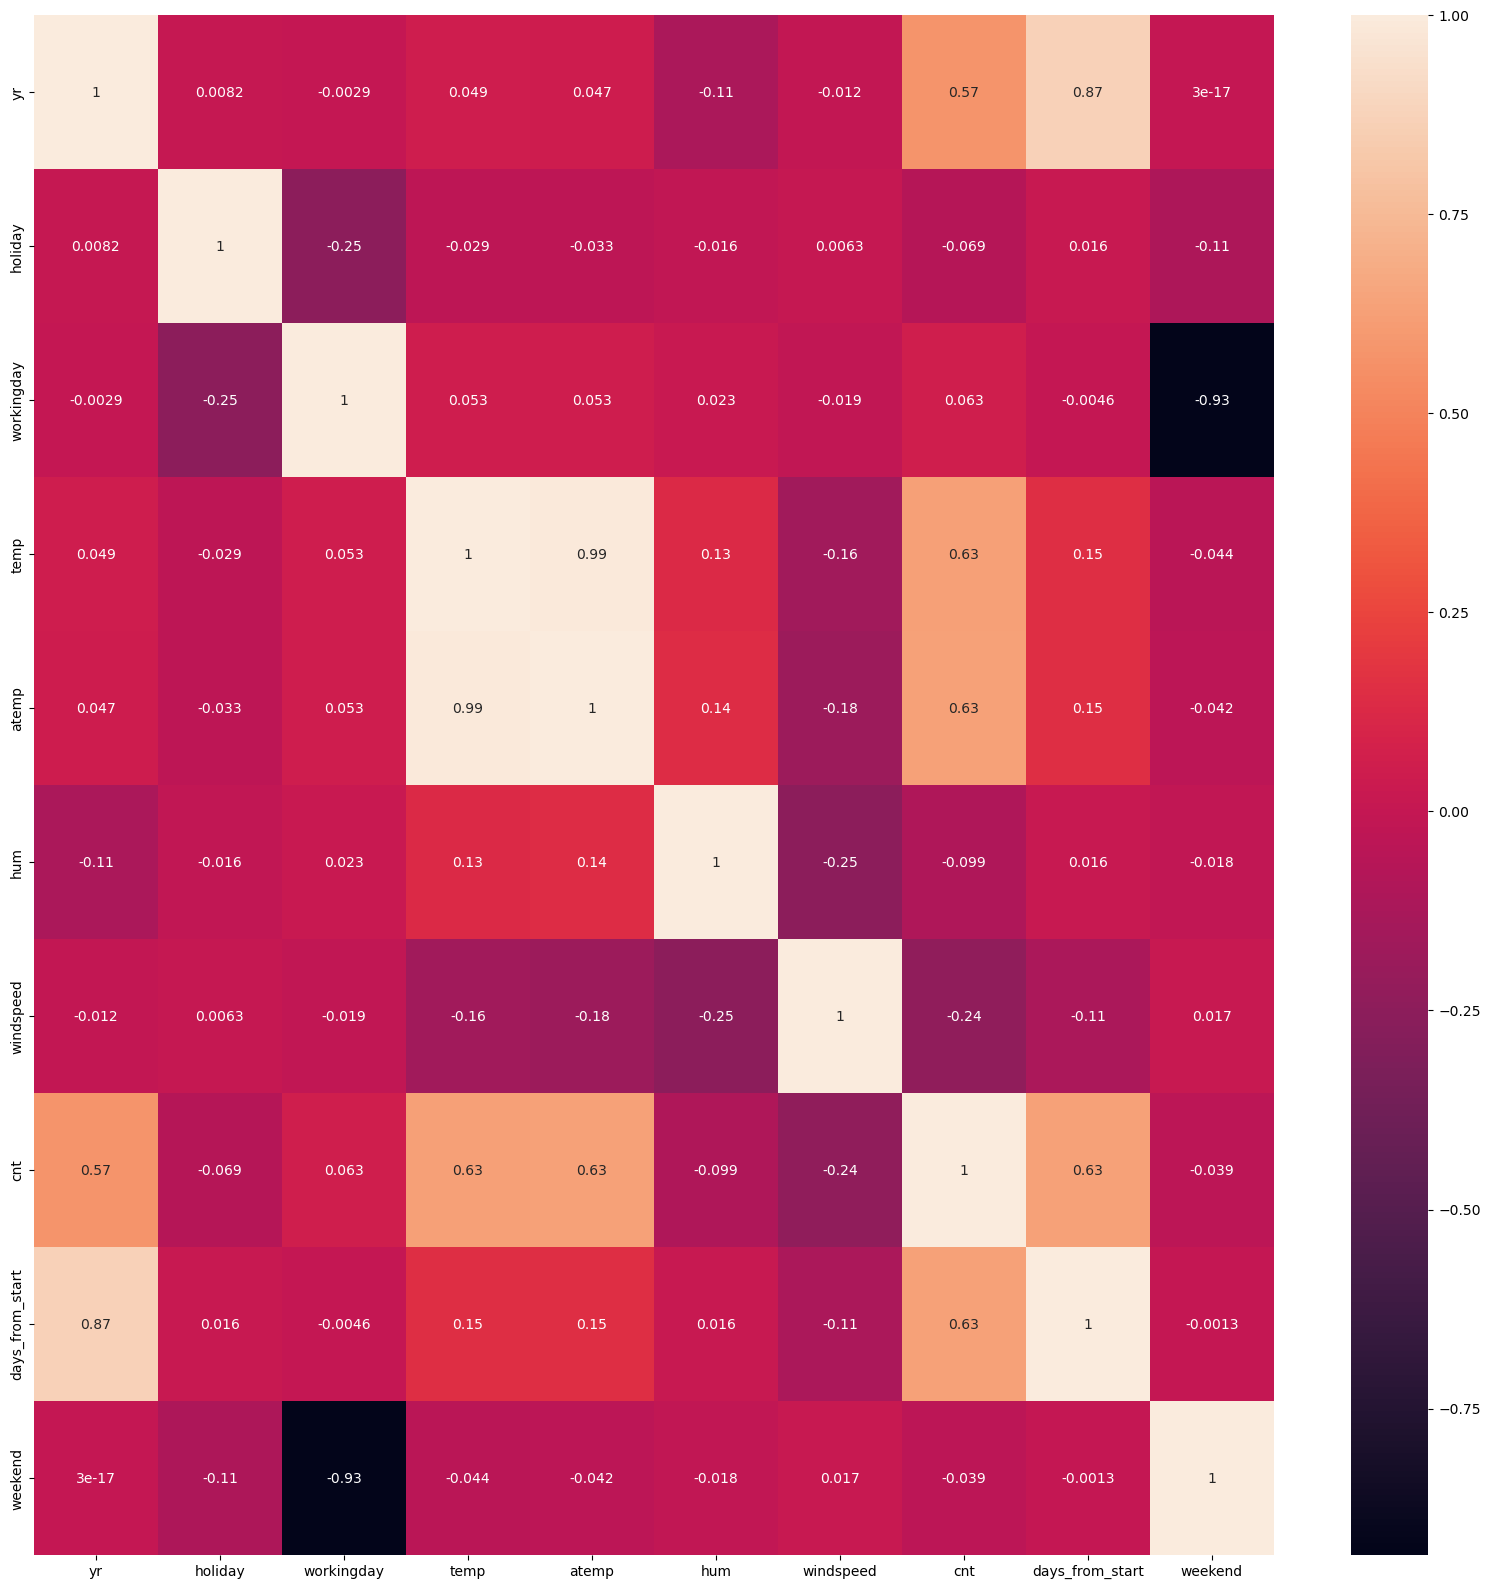

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(bike_data.select_dtypes(include=['int64', 'int32', 'float64']).corr(),annot=True)
plt.show()

In [39]:
# First 5 rows of the data
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985,0,1
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349,2,0
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562,3,0
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600,4,0


#### Creating dummy variable for categorical data

In [40]:
# Dummy variables for 'season' column
bike_data = pd.get_dummies(bike_data,columns=['season'],drop_first=True)
# Dummy variables for 'mnth' column
bike_data = pd.get_dummies(bike_data,columns=['mnth'],drop_first=True)
# Dummy variables for 'weekday' column
bike_data = pd.get_dummies(bike_data,columns=['weekday'],drop_first=True)
# Dummy variables for 'weathersit' column
bike_data = pd.get_dummies(bike_data,columns=['weathersit'],drop_first=True)

In [41]:
# First 5 rows of the data
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,weekend,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
0,0,0,0,14.111,18.181,80.583,10.750,985,0,1,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.903,17.687,69.609,16.652,801,1,1,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.051,9.470,43.727,16.637,1349,2,0,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200,10.606,59.044,10.740,1562,3,0,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305,11.464,43.696,12.522,1600,4,0,...,False,False,False,False,False,False,False,True,False,False


#### Splitting the data into training set and test set

In [42]:
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the train data set and test data set

In [43]:
# Scaling using MinMaxScaler
scaler = MinMaxScaler()
var_to_scale = ['temp', 'atemp', 'hum', 'windspeed','cnt','days_from_start']
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])

##### checking description of train data

In [44]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537273,0.512993,0.650367,0.320776,0.513620,0.505414,0.298039
std,0.500429,0.157763,0.468282,0.225843,0.212381,0.145882,0.169795,0.224593,0.288281,0.457846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339860,0.332097,0.538640,0.199191,0.356420,0.255838,0.000000
50%,1.000000,0.000000,1.000000,0.540527,0.526817,0.653712,0.296782,0.518638,0.510989,0.000000
75%,1.000000,0.000000,1.000000,0.735230,0.688465,0.754830,0.414450,0.684710,0.759272,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### checking description of test data

In [46]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558951,0.532994,0.638506,0.313358,0.520592,0.488704,0.264840
std,0.500722,0.188034,0.459904,0.233699,0.217884,0.148973,0.159945,0.218435,0.293496,0.442259
min,0.000000,0.000000,0.000000,0.046590,0.025963,0.261918,-0.042803,0.048205,0.004121,0.000000
25%,0.000000,0.000000,0.000000,0.354653,0.344757,0.527267,0.198534,0.377531,0.233516,0.000000
50%,0.000000,0.000000,1.000000,0.558716,0.549197,0.627739,0.299461,0.524275,0.478022,0.000000
75%,1.000000,0.000000,1.000000,0.759117,0.714139,0.743925,0.403051,0.672745,0.736951,1.000000
max,1.000000,1.000000,1.000000,0.984440,0.980941,1.002143,0.807483,0.963300,1.001374,1.000000


#### Model Building